# Buisness context


>In this project we will be building a model which we will be using to build a model which predicts the number of seats that mobiticket can expect to sell for each ride.

>There are 14 routes in this dataset.All the routes end in Nairobi and originate to the north west of Nairobi towards lake victoria.

# Data

> All information regarding this data can be found in the following link: https://grow.almabetter.com/data-science/projects/Transport-Demand-Prediction

##  Evaluation metrics 

> We are dealing with a regression problem so we will be using regression evalaution metrics 

> Metrics which will be used are -:
    
        1. MSE
    
        2. MAE
    
        3. RMSE

## Machine learning workflow 

> Our main goal is to build a predictive model which predicts the number of seats that morbitcket can expect to sell for the ride 

> We will be doing hands on project for this with a proper workflow

>We will be seeing which will be the most ideal model for our project 

> We will also be showcasing which are the most important features for our model hopefully it wont be black box model

In [1]:
#let us import the necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
#let us load the data 
data = pd.read_csv('train_revised.csv')

In [3]:
#let us check out the dataframe
data

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49
...,...,...,...,...,...,...,...,...,...,...
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-18,8:00,Awendo,Nairobi,Bus,49
51641,13809,18A,Mpesa,4PEBSVJSNK,20-04-18,8:00,Migori,Nairobi,Bus,49
51642,13809,17A,Mpesa,LVN64LZDNN,20-04-18,8:00,Migori,Nairobi,Bus,49
51643,13796,16B,Mpesa,REYBSKTYWN,20-04-18,7:08,Awendo,Nairobi,Bus,49


## Let us perfrom some EDA(Exploratory Data Analysis)

In [4]:
#let us check the head of the dataframe
data.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [5]:
#let us check the tail of the dataframe 
data.tail()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-18,8:00,Awendo,Nairobi,Bus,49
51641,13809,18A,Mpesa,4PEBSVJSNK,20-04-18,8:00,Migori,Nairobi,Bus,49
51642,13809,17A,Mpesa,LVN64LZDNN,20-04-18,8:00,Migori,Nairobi,Bus,49
51643,13796,16B,Mpesa,REYBSKTYWN,20-04-18,7:08,Awendo,Nairobi,Bus,49
51644,14304,7,Mpesa,AQN7FBUSGP,14-11-17,5:10,Kisii,Nairobi,Bus,49


In [6]:
#let us check the information on the various attributes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


## We can see that there are 51645 entries and 10 columns in total

In [7]:
#let us describe the data from some ddescriptive analysis
data.describe()

,ride_id,max_capacity
count,51645.000000,51645.000000
mean,10188.645793,34.534321
std,2211.295708,18.451193
min,1442.000000,11.000000
25%,8287.000000,11.000000
50%,10353.000000,49.000000
75%,12029.000000,49.000000
max,20117.000000,49.000000


## OBSERVATIONS - :
* We notice that the minimum number of seats in a vehicle is 11 and the maximum number of seats in a vehicle is 49

In [8]:
#let us check out the columns of the dataframe
data.columns

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity'],
      dtype='object')

In [9]:
#let us segregate the numeric columns and object type columns from the dataframe.
numeric_cols=[]
categorical_cols=[]
for col,content in data.items():#here we treat the dataframe like a dictonary 
    if pd.api.types.is_numeric_dtype(content):#here it will iterate through every value in the series and check if it is numeric or object dtype
        numeric_cols.append(col)
    elif pd.api.types.is_object_dtype(content):
        categorical_cols.append(col)
        

In [10]:
#let us check out the lists
numeric_cols#there are only two numeric cols
categorical_cols#there are 8 object columns


['seat_number',
 'payment_method',
 'payment_receipt',
 'travel_date',
 'travel_time',
 'travel_from',
 'travel_to',
 'car_type']

In [11]:
#let us check out for some missing values 
data.isna().sum()

ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64

## There are no missing values in this dataset

In [12]:
#let us check if there duplicate values for that we will be defining a function which will iterate through all columns ]
def duplicates(df):
    for col in df.columns:
        if len(df[col])!=len(set(df[col])):
            print(f'The columns{col} has duplicate values')
        else:
            print(f'{col} has no duplicate values')

In [13]:
#let us check if the function works
duplicates(data)

The columnsride_id has duplicate values
The columnsseat_number has duplicate values
The columnspayment_method has duplicate values
payment_receipt has no duplicate values
The columnstravel_date has duplicate values
The columnstravel_time has duplicate values
The columnstravel_from has duplicate values
The columnstravel_to has duplicate values
The columnscar_type has duplicate values
The columnsmax_capacity has duplicate values


## From the above result we can see that almost all the columns have duplicate values

In [14]:
#i will be defining a function for outliers to check if there are outliers.

## For those who do not know what outliers are they are the datapoints which are different from the majority distribution or rest of the data points that are present 


## There are two ways to check for outliers-
   * Interquartile range method 
   * Box plots 

In [15]:
def outliers(df):
    for c in df.describe().columns:
        arr = np.array(df[c])
        sort_arr=np.sort(arr)
        q1,q3=np.percentile(sort_arr,[25,75])
        iqr=q3-q1
        lower_fence = q1-1.5*(iqr)
        upper_fence = q3+1.5*(iqr)
        cleaned_data = df[(df[c]>=lower_fence) & (df[c]<=upper_fence)]
    return cleaned_data

In [16]:
outliers(data)

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49
...,...,...,...,...,...,...,...,...,...,...
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-18,8:00,Awendo,Nairobi,Bus,49
51641,13809,18A,Mpesa,4PEBSVJSNK,20-04-18,8:00,Migori,Nairobi,Bus,49
51642,13809,17A,Mpesa,LVN64LZDNN,20-04-18,8:00,Migori,Nairobi,Bus,49
51643,13796,16B,Mpesa,REYBSKTYWN,20-04-18,7:08,Awendo,Nairobi,Bus,49


In [17]:
data

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49
...,...,...,...,...,...,...,...,...,...,...
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-18,8:00,Awendo,Nairobi,Bus,49
51641,13809,18A,Mpesa,4PEBSVJSNK,20-04-18,8:00,Migori,Nairobi,Bus,49
51642,13809,17A,Mpesa,LVN64LZDNN,20-04-18,8:00,Migori,Nairobi,Bus,49
51643,13796,16B,Mpesa,REYBSKTYWN,20-04-18,7:08,Awendo,Nairobi,Bus,49


In [20]:
data.describe().columns

Index(['ride_id', 'max_capacity'], dtype='object')

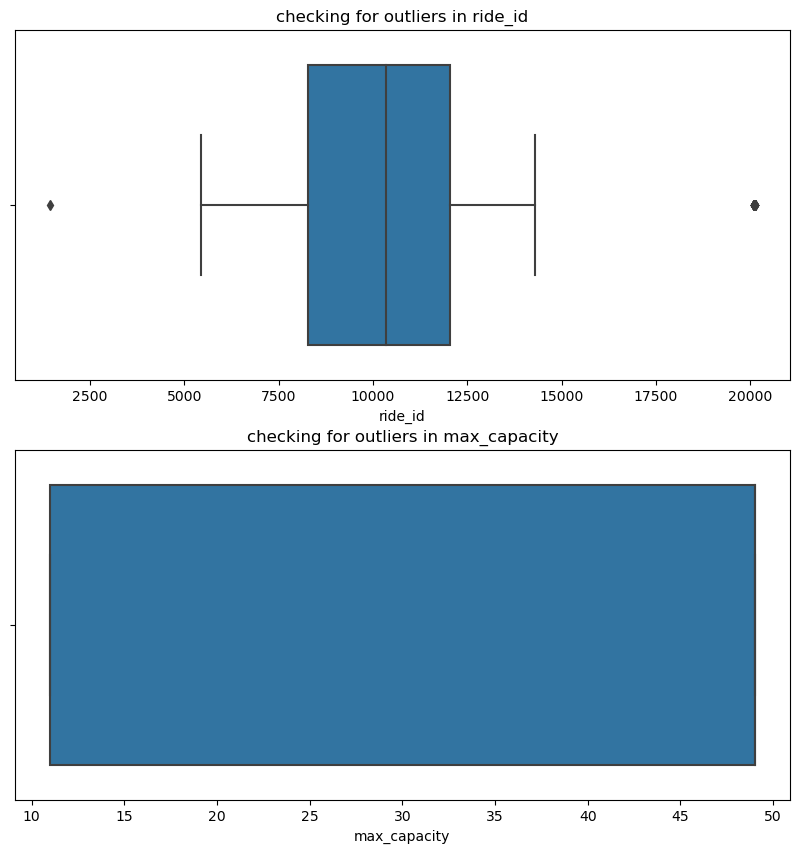

In [27]:
#LET US MAKE BOX PLOTS 
fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(10,10))
for index,col in enumerate(data.describe().columns):
    sns.boxplot(x=col,data=data,ax=ax[index])
    ax[index].set_title(f'checking for outliers in {col}')



## As the outliers function and the plots suggest there are little to no outliers 

In [30]:
#let us start off with some visualization
data

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49
...,...,...,...,...,...,...,...,...,...,...
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-18,8:00,Awendo,Nairobi,Bus,49
51641,13809,18A,Mpesa,4PEBSVJSNK,20-04-18,8:00,Migori,Nairobi,Bus,49
51642,13809,17A,Mpesa,LVN64LZDNN,20-04-18,8:00,Migori,Nairobi,Bus,49
51643,13796,16B,Mpesa,REYBSKTYWN,20-04-18,7:08,Awendo,Nairobi,Bus,49


In [31]:
#let us checkout the payment methods 
data['payment_method'].value_counts()

Mpesa    51532
Cash       113
Name: payment_method, dtype: int64

([<matplotlib.patches.Wedge at 0x2106f149070>,
 [Text(-1.0999740124079396, 0.007561218630501732, 'Mpesa'),
  Text(1.0999740121092798, -0.0075612620781424465, 'Cash')],
 [Text(-0.5999858249497851, 0.004124301071182762, '99.8%'),
  Text(0.5999858247868798, -0.004124324769895879, '0.2%')])

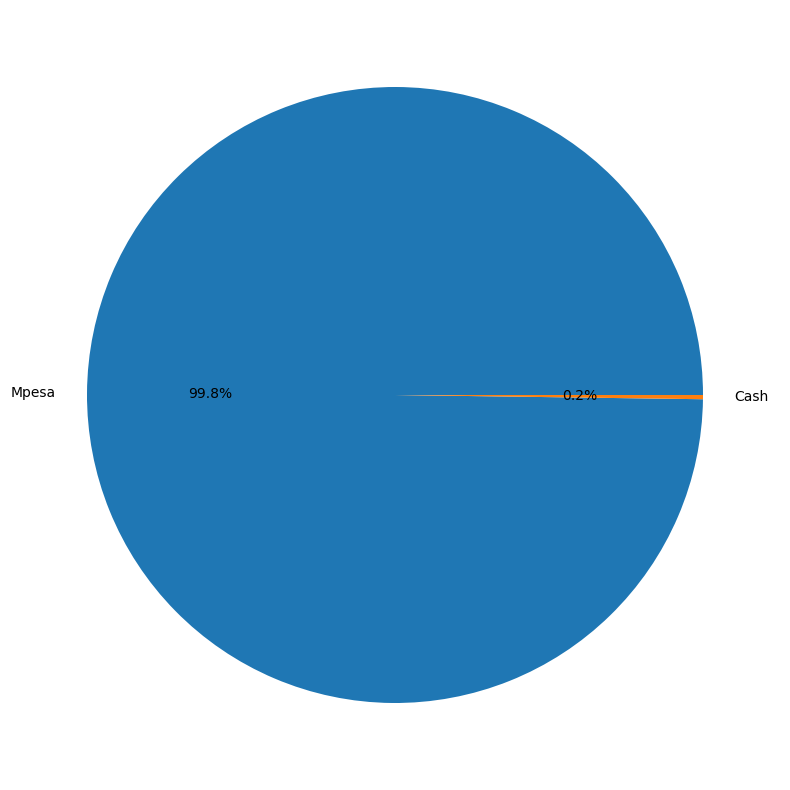

In [41]:
plt.figure(figsize=(10,10))
plt.pie(data['payment_method'].value_counts(),labels=['Mpesa','Cash'],autopct='%1.1f%%')

## From the above pioe chart we can notice that most people prefer paying through Mpesa rathe than cash.

## What is Mpesa? 
    * M-PESA is a mobile phone-based money transfer service, payments and micro-financing service so it makes sense since its using their mobile phones to transfer money it saves them the trouble of carrying cash all the time and this is an extremely good thing.

In [34]:
data

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49
...,...,...,...,...,...,...,...,...,...,...
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-18,8:00,Awendo,Nairobi,Bus,49
51641,13809,18A,Mpesa,4PEBSVJSNK,20-04-18,8:00,Migori,Nairobi,Bus,49
51642,13809,17A,Mpesa,LVN64LZDNN,20-04-18,8:00,Migori,Nairobi,Bus,49
51643,13796,16B,Mpesa,REYBSKTYWN,20-04-18,7:08,Awendo,Nairobi,Bus,49


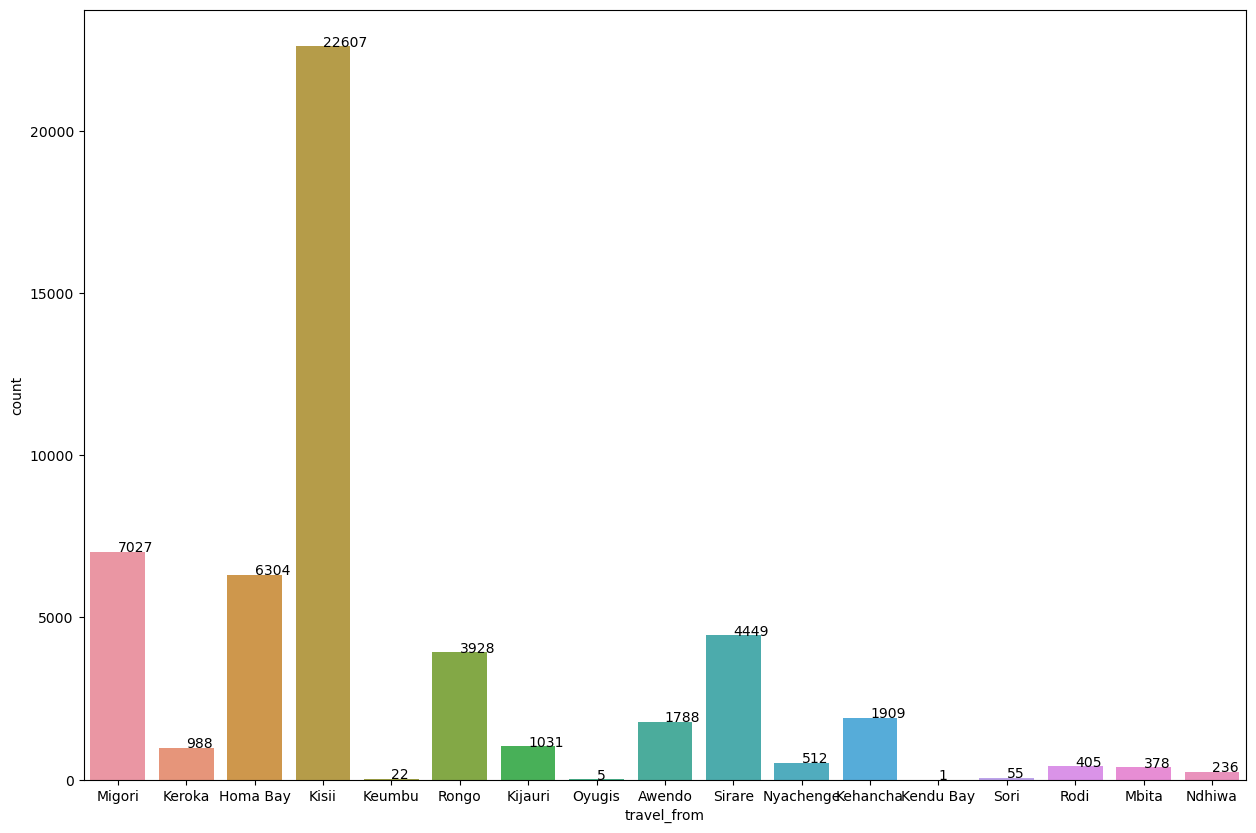

In [40]:
#let us check the peopel who travel from different cities
fig,ax = plt.subplots(figsize=(15,10))
ax=sns.countplot(x='travel_from',data=data)
for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2,p.get_height()+1,p.get_height())

## Observation -- 
    * Here we can see that most of the people were travelling from Kisii followed by migori and then homa bay
    * Why are there so many travelling from kisii is it because most of the people travelling from here are the working population or are they going on vacation ?

In [42]:
data

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49
...,...,...,...,...,...,...,...,...,...,...
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-18,8:00,Awendo,Nairobi,Bus,49
51641,13809,18A,Mpesa,4PEBSVJSNK,20-04-18,8:00,Migori,Nairobi,Bus,49
51642,13809,17A,Mpesa,LVN64LZDNN,20-04-18,8:00,Migori,Nairobi,Bus,49
51643,13796,16B,Mpesa,REYBSKTYWN,20-04-18,7:08,Awendo,Nairobi,Bus,49


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


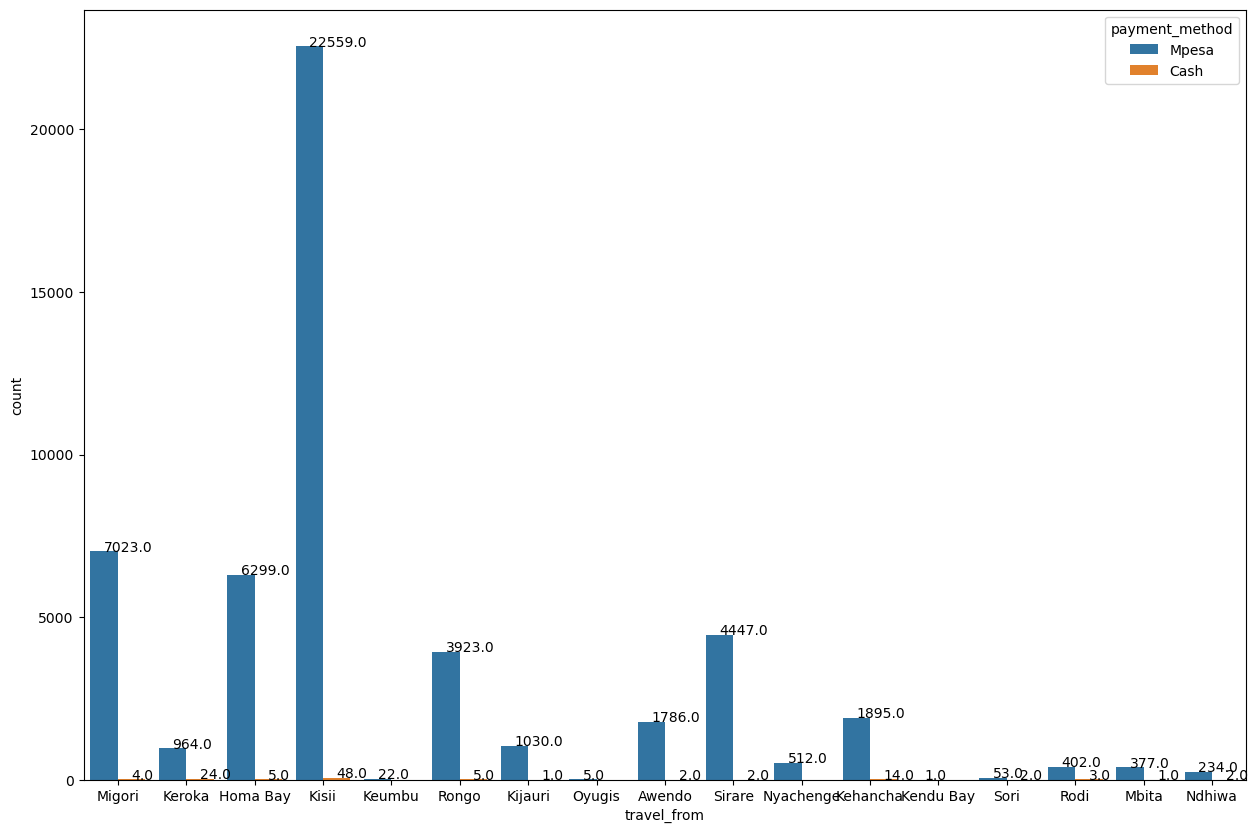

In [43]:
fig,ax = plt.subplots(figsize=(15,10))
ax=sns.countplot(x='travel_from',data=data,hue='payment_method')
for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2,p.get_height()+1,p.get_height())

## Here we can see that most of the people travelling paid using mpesa from every town

In [44]:
data

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49
...,...,...,...,...,...,...,...,...,...,...
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-18,8:00,Awendo,Nairobi,Bus,49
51641,13809,18A,Mpesa,4PEBSVJSNK,20-04-18,8:00,Migori,Nairobi,Bus,49
51642,13809,17A,Mpesa,LVN64LZDNN,20-04-18,8:00,Migori,Nairobi,Bus,49
51643,13796,16B,Mpesa,REYBSKTYWN,20-04-18,7:08,Awendo,Nairobi,Bus,49


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


### As we can see we have travel data we can convert the travel data to datetime and perfrom a little bit of feature enginerring .

# FEATURE ENGINEEGING

In [46]:
#LET US CONVER THE TRAVEL DATE TO DATETIME 
data['travel_date'] =pd.to_datetime(data['travel_date'])

In [47]:
#let us review the data
data


,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,2017-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,2017-11-19,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,2017-11-26,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,2017-11-27,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,2017-11-27,7:12,Migori,Nairobi,Bus,49
...,...,...,...,...,...,...,...,...,...,...
51640,13826,9B,Mpesa,8V2XDDZR6V,2018-04-20,8:00,Awendo,Nairobi,Bus,49
51641,13809,18A,Mpesa,4PEBSVJSNK,2018-04-20,8:00,Migori,Nairobi,Bus,49
51642,13809,17A,Mpesa,LVN64LZDNN,2018-04-20,8:00,Migori,Nairobi,Bus,49
51643,13796,16B,Mpesa,REYBSKTYWN,2018-04-20,7:08,Awendo,Nairobi,Bus,49


In [52]:
data.info()
#as we can see that travel-date has been converted to datetime object 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ride_id          51645 non-null  int64         
 1   seat_number      51645 non-null  object        
 2   payment_method   51645 non-null  object        
 3   payment_receipt  51645 non-null  object        
 4   travel_date      51645 non-null  datetime64[ns]
 5   travel_time      51645 non-null  object        
 6   travel_from      51645 non-null  object        
 7   travel_to        51645 non-null  object        
 8   car_type         51645 non-null  object        
 9   max_capacity     51645 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 3.9+ MB


In [54]:
#LET US MAKE SOME NEW COLUMNS 
#this is feature enginerring 
data['Day'] = data['travel_date'].dt.day
data['Year']=data['travel_date'].dt.year
data['Month']= data['travel_date'].dt.month

In [55]:
#let us view the columns 
data

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,Day,Year,Month
0,1442,15A,Mpesa,UZUEHCBUSO,2017-10-17,7:15,Migori,Nairobi,Bus,49,17,2017,10
1,5437,14A,Mpesa,TIHLBUSGTE,2017-11-19,7:12,Migori,Nairobi,Bus,49,19,2017,11
2,5710,8B,Mpesa,EQX8Q5G19O,2017-11-26,7:05,Keroka,Nairobi,Bus,49,26,2017,11
3,5777,19A,Mpesa,SGP18CL0ME,2017-11-27,7:10,Homa Bay,Nairobi,Bus,49,27,2017,11
4,5778,11A,Mpesa,BM97HFRGL9,2017-11-27,7:12,Migori,Nairobi,Bus,49,27,2017,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51640,13826,9B,Mpesa,8V2XDDZR6V,2018-04-20,8:00,Awendo,Nairobi,Bus,49,20,2018,4
51641,13809,18A,Mpesa,4PEBSVJSNK,2018-04-20,8:00,Migori,Nairobi,Bus,49,20,2018,4
51642,13809,17A,Mpesa,LVN64LZDNN,2018-04-20,8:00,Migori,Nairobi,Bus,49,20,2018,4
51643,13796,16B,Mpesa,REYBSKTYWN,2018-04-20,7:08,Awendo,Nairobi,Bus,49,20,2018,4


In [56]:
#let us check the info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ride_id          51645 non-null  int64         
 1   seat_number      51645 non-null  object        
 2   payment_method   51645 non-null  object        
 3   payment_receipt  51645 non-null  object        
 4   travel_date      51645 non-null  datetime64[ns]
 5   travel_time      51645 non-null  object        
 6   travel_from      51645 non-null  object        
 7   travel_to        51645 non-null  object        
 8   car_type         51645 non-null  object        
 9   max_capacity     51645 non-null  int64         
 10  Day              51645 non-null  int64         
 11  Year             51645 non-null  int64         
 12  Month            51645 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(7)
memory usage: 5.1+ MB


In [57]:
data

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,Day,Year,Month
0,1442,15A,Mpesa,UZUEHCBUSO,2017-10-17,7:15,Migori,Nairobi,Bus,49,17,2017,10
1,5437,14A,Mpesa,TIHLBUSGTE,2017-11-19,7:12,Migori,Nairobi,Bus,49,19,2017,11
2,5710,8B,Mpesa,EQX8Q5G19O,2017-11-26,7:05,Keroka,Nairobi,Bus,49,26,2017,11
3,5777,19A,Mpesa,SGP18CL0ME,2017-11-27,7:10,Homa Bay,Nairobi,Bus,49,27,2017,11
4,5778,11A,Mpesa,BM97HFRGL9,2017-11-27,7:12,Migori,Nairobi,Bus,49,27,2017,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51640,13826,9B,Mpesa,8V2XDDZR6V,2018-04-20,8:00,Awendo,Nairobi,Bus,49,20,2018,4
51641,13809,18A,Mpesa,4PEBSVJSNK,2018-04-20,8:00,Migori,Nairobi,Bus,49,20,2018,4
51642,13809,17A,Mpesa,LVN64LZDNN,2018-04-20,8:00,Migori,Nairobi,Bus,49,20,2018,4
51643,13796,16B,Mpesa,REYBSKTYWN,2018-04-20,7:08,Awendo,Nairobi,Bus,49,20,2018,4


In [59]:
data['travel_time'] = pd.to_datetime(data['travel_time'])

In [60]:
#let us make some more new columns 
data['Hours'] = data['travel_time'].dt.hour

In [61]:
data

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,Day,Year,Month,Hours
0,1442,15A,Mpesa,UZUEHCBUSO,2017-10-17,2023-04-28 07:15:00,Migori,Nairobi,Bus,49,17,2017,10,7
1,5437,14A,Mpesa,TIHLBUSGTE,2017-11-19,2023-04-28 07:12:00,Migori,Nairobi,Bus,49,19,2017,11,7
2,5710,8B,Mpesa,EQX8Q5G19O,2017-11-26,2023-04-28 07:05:00,Keroka,Nairobi,Bus,49,26,2017,11,7
3,5777,19A,Mpesa,SGP18CL0ME,2017-11-27,2023-04-28 07:10:00,Homa Bay,Nairobi,Bus,49,27,2017,11,7
4,5778,11A,Mpesa,BM97HFRGL9,2017-11-27,2023-04-28 07:12:00,Migori,Nairobi,Bus,49,27,2017,11,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51640,13826,9B,Mpesa,8V2XDDZR6V,2018-04-20,2023-04-28 08:00:00,Awendo,Nairobi,Bus,49,20,2018,4,8
51641,13809,18A,Mpesa,4PEBSVJSNK,2018-04-20,2023-04-28 08:00:00,Migori,Nairobi,Bus,49,20,2018,4,8
51642,13809,17A,Mpesa,LVN64LZDNN,2018-04-20,2023-04-28 08:00:00,Migori,Nairobi,Bus,49,20,2018,4,8
51643,13796,16B,Mpesa,REYBSKTYWN,2018-04-20,2023-04-28 07:08:00,Awendo,Nairobi,Bus,49,20,2018,4,7


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ride_id          51645 non-null  int64         
 1   seat_number      51645 non-null  object        
 2   payment_method   51645 non-null  object        
 3   payment_receipt  51645 non-null  object        
 4   travel_date      51645 non-null  datetime64[ns]
 5   travel_time      51645 non-null  datetime64[ns]
 6   travel_from      51645 non-null  object        
 7   travel_to        51645 non-null  object        
 8   car_type         51645 non-null  object        
 9   max_capacity     51645 non-null  int64         
 10  Day              51645 non-null  int64         
 11  Year             51645 non-null  int64         
 12  Month            51645 non-null  int64         
 13  Hours            51645 non-null  int64         
dtypes: datetime64[ns](2), int64(6), object

In [66]:
#let us now drop the the travel_date and travel_time column
data.drop(['travel_date','travel_time'],axis=1,inplace=True)

In [69]:
#let us check the dataframe again
data

,ride_id,seat_number,payment_method,payment_receipt,travel_from,travel_to,car_type,max_capacity,Day,Year,Month,Hours
0,1442,15A,Mpesa,UZUEHCBUSO,Migori,Nairobi,Bus,49,17,2017,10,7
1,5437,14A,Mpesa,TIHLBUSGTE,Migori,Nairobi,Bus,49,19,2017,11,7
2,5710,8B,Mpesa,EQX8Q5G19O,Keroka,Nairobi,Bus,49,26,2017,11,7
3,5777,19A,Mpesa,SGP18CL0ME,Homa Bay,Nairobi,Bus,49,27,2017,11,7
4,5778,11A,Mpesa,BM97HFRGL9,Migori,Nairobi,Bus,49,27,2017,11,7
...,...,...,...,...,...,...,...,...,...,...,...,...
51640,13826,9B,Mpesa,8V2XDDZR6V,Awendo,Nairobi,Bus,49,20,2018,4,8
51641,13809,18A,Mpesa,4PEBSVJSNK,Migori,Nairobi,Bus,49,20,2018,4,8
51642,13809,17A,Mpesa,LVN64LZDNN,Migori,Nairobi,Bus,49,20,2018,4,8
51643,13796,16B,Mpesa,REYBSKTYWN,Awendo,Nairobi,Bus,49,20,2018,4,7


In [71]:
#let us drop the ride_id since ever yone has a unique ride_id so it will not give us an information
data.drop('ride_id',axis=1,inplace=True)

In [74]:
#LETS MAKE A COPY OF THE DATAFRAME
ticket_df=data.copy()

In [75]:
ticket_df

,seat_number,payment_method,payment_receipt,travel_from,travel_to,car_type,max_capacity,Day,Year,Month,Hours
0,15A,Mpesa,UZUEHCBUSO,Migori,Nairobi,Bus,49,17,2017,10,7
1,14A,Mpesa,TIHLBUSGTE,Migori,Nairobi,Bus,49,19,2017,11,7
2,8B,Mpesa,EQX8Q5G19O,Keroka,Nairobi,Bus,49,26,2017,11,7
3,19A,Mpesa,SGP18CL0ME,Homa Bay,Nairobi,Bus,49,27,2017,11,7
4,11A,Mpesa,BM97HFRGL9,Migori,Nairobi,Bus,49,27,2017,11,7
...,...,...,...,...,...,...,...,...,...,...,...
51640,9B,Mpesa,8V2XDDZR6V,Awendo,Nairobi,Bus,49,20,2018,4,8
51641,18A,Mpesa,4PEBSVJSNK,Migori,Nairobi,Bus,49,20,2018,4,8
51642,17A,Mpesa,LVN64LZDNN,Migori,Nairobi,Bus,49,20,2018,4,8
51643,16B,Mpesa,REYBSKTYWN,Awendo,Nairobi,Bus,49,20,2018,4,7


In [78]:
#we will be working with this duplicate dataset 
ticket_df.drop('seat_number',axis=1,inplace=True)

In [79]:
ticket_df

,payment_method,payment_receipt,travel_from,travel_to,car_type,max_capacity,Day,Year,Month,Hours
0,Mpesa,UZUEHCBUSO,Migori,Nairobi,Bus,49,17,2017,10,7
1,Mpesa,TIHLBUSGTE,Migori,Nairobi,Bus,49,19,2017,11,7
2,Mpesa,EQX8Q5G19O,Keroka,Nairobi,Bus,49,26,2017,11,7
3,Mpesa,SGP18CL0ME,Homa Bay,Nairobi,Bus,49,27,2017,11,7
4,Mpesa,BM97HFRGL9,Migori,Nairobi,Bus,49,27,2017,11,7
...,...,...,...,...,...,...,...,...,...,...
51640,Mpesa,8V2XDDZR6V,Awendo,Nairobi,Bus,49,20,2018,4,8
51641,Mpesa,4PEBSVJSNK,Migori,Nairobi,Bus,49,20,2018,4,8
51642,Mpesa,LVN64LZDNN,Migori,Nairobi,Bus,49,20,2018,4,8
51643,Mpesa,REYBSKTYWN,Awendo,Nairobi,Bus,49,20,2018,4,7


## If we notice our independent data we have a lot of attributes which are objects we need to conver them to numerical values as machine learning models only understand numerical data.

In [90]:
for col,content in ticket_df.items():
    if pd.api.types.is_object_dtype(content):
        ticket_df[col]=content.astype("category").cat.codes#this code we first convert all the object / string types into cateogorical values and then we numerically encode those values so that our model can learn trends or patterns as ml models only understand numbers.

In [91]:
ticket_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   payment_method   51645 non-null  int8 
 1   payment_receipt  51645 non-null  int32
 2   travel_from      51645 non-null  int8 
 3   travel_to        51645 non-null  int8 
 4   car_type         51645 non-null  int8 
 5   max_capacity     51645 non-null  int64
 6   Day              51645 non-null  int64
 7   Year             51645 non-null  int64
 8   Month            51645 non-null  int64
 9   Hours            51645 non-null  int64
dtypes: int32(1), int64(5), int8(4)
memory usage: 2.4 MB


In [92]:
ticket_df

,payment_method,payment_receipt,travel_from,travel_to,car_type,max_capacity,Day,Year,Month,Hours
0,1,43276,9,0,0,49,17,2017,10,7
1,1,40729,9,0,0,49,19,2017,11,7
2,1,16007,4,0,0,49,26,2017,11,7
3,1,39000,1,0,0,49,27,2017,11,7
4,1,10833,9,0,0,49,27,2017,11,7
...,...,...,...,...,...,...,...,...,...,...
51640,1,7252,0,0,0,49,20,2018,4,8
51641,1,3814,9,0,0,49,20,2018,4,8
51642,1,27883,9,0,0,49,20,2018,4,8
51643,1,37190,0,0,0,49,20,2018,4,7


In [110]:
ticket_df.drop('payment_receipt',axis=1,inplace=True)

In [111]:
#let us now split the variable 
X = ticket_df.drop('max_capacity',axis=1)#independent features 
y = ticket_df['max_capacity']#target label

In [112]:

X

,payment_method,travel_from,travel_to,car_type,Day,Year,Month,Hours
0,1,9,0,0,17,2017,10,7
1,1,9,0,0,19,2017,11,7
2,1,4,0,0,26,2017,11,7
3,1,1,0,0,27,2017,11,7
4,1,9,0,0,27,2017,11,7
...,...,...,...,...,...,...,...,...
51640,1,0,0,0,20,2018,4,8
51641,1,9,0,0,20,2018,4,8
51642,1,9,0,0,20,2018,4,8
51643,1,0,0,0,20,2018,4,7


In [113]:
y

0        49
1        49
2        49
3        49
4        49
         ..
51640    49
51641    49
51642    49
51643    49
51644    49
Name: max_capacity, Length: 51645, dtype: int64

## Since all our data has been converted into numerical let us jump into ml modelling 

# MODELLING 

In [114]:
#LET US IMPORT THE LIBRARIES NECESARRY 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error

In [115]:
#let us divide our datai into train and test set 
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
#In the code snippet you provided, random_state is an optional parameter in the train_test_split function from scikit-learn library. It is used to control the random shuffling applied to the data before splitting it into training and testing sets.

#Setting a specific random_state value ensures that the data is split in the same way every time you run the code, which can be useful for reproducibility.


In [118]:
#let us now fit an instance of the model 
models={'Linear Regression':LinearRegression(),
       'Random Regrressor':RandomForestRegressor()}#here i have defined a dictionary of all the models we will be using ś
score={}#this is an empty dictionary where we will be storing the scores of our model
for model_name,model in models.items():
    model.fit(x_train,y_train)
    score[model_name] = model.score(x_test,y_test)#this will store accuracy in the scores dictioanry for every model we have specified 
    

In [119]:
#let us check out score 
score

{'Linear Regression': 1.0, 'Random Regrressor': 1.0}

In [121]:
score_df = pd.DataFrame(score,index=[0])

In [123]:
#let us check out the dataframe
score_df

,Linear Regression,Random Regrressor
0,1.0,1.0


<AxesSubplot:>

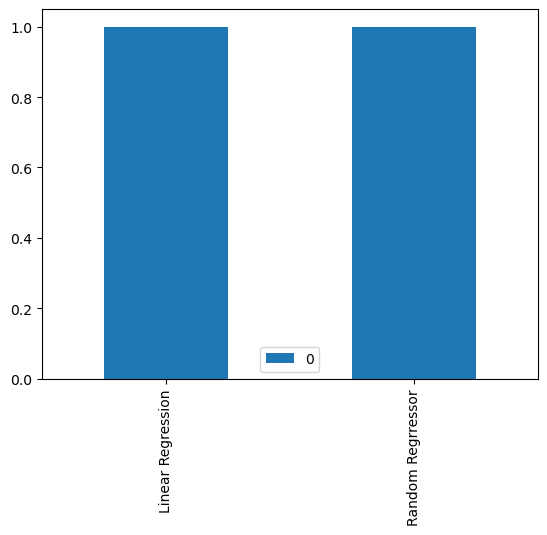

In [124]:
score_df.T.plot.bar()


In [128]:
#let us define an evaluation function 
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error

def custom_function(model):
    ideal_model = model()
    ideal_model.fit(x_train, y_train)  # Include y_train as an argument
    y_preds = ideal_model.predict(x_test)
    scores = {
        'MAE': mean_absolute_error(y_test, y_preds),
        'MSE': mean_squared_error(y_test, y_preds),
        'MSLE': mean_squared_log_error(y_test, y_preds)
    }
    return scores


In [130]:
#let us test the function 
custom_function(RandomForestRegressor)

{'MAE': 0.0, 'MSE': 0.0, 'MSLE': 0.0}

## From the evaluation metrics and the score method we have learnt the following :
 * Even though i tried to optimize the model i have come to the conclusion that there is either not enough data or the quality of data is not good for evaluating the model and needs further investigation.
 
 * Im gettign a perfect test score which means it is overfitting the test data 
 * If the Mean Squared Error (MSE) and Mean Absolute Error (MAE) scores are both zero, it typically indicates a perfect fit between the predicted values and the actual values. This means that the model's predictions match the target values exactly for all data points in the evaluation set.

* In some cases, achieving an MSE or MAE of zero may indicate overfitting, where the model has essentially memorized the training data and is unable to generalize well to new, unseen data. Overfitting can be a concern because it may result in poor performance on unseen data.